# Unsupervised Outlier Detection Using Empirical Cumulative Distribution Functions (ECOD)

----

**Created by**:

- **Author**: Dr. Saad Laouadi
- **Date**: 11/08/2024

This notebook was created by dr. Saad Laouadi on August 11th, 2024 as part of a series on anomaly detection algorithms. The content is designed for researchers, data scientists, and practitioners interested in applying the ECOD algorithm to identify anomalies in diverse datasets.

**Copyright**

**© 2024 Dr. Saad Laouadi. All rights reserved.**

---

**Pre-requisites:**

This notebook assumes a foundational understanding of Python tools for data manipulation and processing. The following prerequisites will help you get the most out of this material:

1. **Data Manipulation**:
   - Familiarity with reading and writing data using libraries such as **Pandas** and **NumPy**.

2. **Machine Learning Workflow**:
   - Prior experience with the **Scikit-learn** library, including:
     - Preprocessing techniques like scaling and normalization.
     - Splitting data into training and test sets using tools like `train_test_split`.

3. **Data Visualization**:
   - Proficiency in using plotting libraries such as **Matplotlib** and **Seaborn** for visualizing data and model results.

## Table of Contents

1. [Objective](#Objective)
2. [Introduction to ABOD](#Introduction-to-ABOD)
   - 2.1. [Theory and Background](#Theory-and-Background)
   - 2.2. [How ABOD Works](#How-ABOD-Works)
   - 2.3. [Why Use ABOD?](#Why-Use-ABOD?)
3. [Steps for Training the ABOD Algorithm](#Steps-for-Training-the-ABOD-Algorithm)
   - 3.1. [Data Preprocessing](#Data-Preprocessing)
   - 3.2. [Algorithm Initialization](#Algorithm-Initialization)
   - 3.3. [Model Training](#Model-Training)
   - 3.4. [Model Evaluation](#Model-Evaluation)
4. [Artificial Example with Simulated Data](#Artificial-Example-with-Simulated-Data)
   - 4.1. [Generating Simulated Data](#Generating-Simulated-Data)
   - 4.2. [Training ABOD on Simulated Data](#Training-ABOD-on-Simulated-Data)
   - 4.3. [Results and Visualization](#Results-and-Visualization)
5. [Real-World Example](#Real-World-Example)
   - 5.1. [Dataset Introduction](#Dataset-Introduction)
   - 5.2. [Preprocessing the Real-World Data](#Preprocessing-the-Real-World-Data)
   - 5.3. [Applying ABOD to Real-World Data](#Applying-ABOD-to-Real-World-Data)
   - 5.4. [Analyzing Results](#Analyzing-Results)
6. [Testing ABOD on Multiple Datasets](#Testing-ABOD-on-Multiple-Datasets)
   - 6.1. [Overview of Datasets](#Overview-of-Datasets)
   - 6.2. [Batch Testing and Performance Evaluation](#Batch-Testing-and-Performance-Evaluation)
   - 6.3. [Summary of Results](#Summary-of-Results)
7. [Conclusion](#Conclusion)
8. [References](#References)

In [1]:
# ============================================================================================# 
#                         Environment Setup
#  Here we import all the necessary modules and tools we will use through this notebook
# ============================================================================================# 

import numpy as np 
import pandas as pd
from scipy.io import arff

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from pyod.models.abod import ABOD

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns

# The utils module is not an installable package, it is the same directory as this notebook
from utils import generate_data, visualize_data, apply_abod, apply_abod_advanced, precision_at_rank_n
from utils import grid_search_abod, hyperopt_objective
from utils import preprocess_pipeline

from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from hyperopt.pyll.base import scope

## Objective

The primary objective of this notebook is to provide a comprehensive understanding of the **Empirical Cumulative Outlier Detector (ECOD)** algorithm, including its theoretical foundation, practical implementation, and evaluation. We will explore both artificial and real-world examples to demonstrate the algorithm's capabilities in detecting outliers in various datasets.

## Introduction to ECOD

### Theory and Background

The Angle-based Outlier Detector (ABOD) algorithm is a powerful technique for detecting anomalies in high-dimensional datasets. It operates by examining the variance of angles between a point and all other pairs of points in the dataset. Points with a low variance in angles are more likely to be outliers, as they exhibit an unusual spatial relationship with other data points.

ABOD stands for Angle-Based Outlier Detection. It’s an anomaly detection algorithm that uses the angle variance between a data point and its neighbors to determine how much of an outlier the point is. The intuition behind ABOD is that outliers will have a higher variance in the angles to their neighbors compared to normal points.


It is based on the concept of the angle-based outlier factor (ABOF), which measures the outlierness of a data point based on the angles between the vector connecting the point to its neighbors and the other vectors connecting the point to its neighbors.

### How ECOD Works
The ABOD algorithm works as follows:

1. **Compute the Angle-Based Outlier Factor (ABOF)**: For each data point x, the ABOD algorithm computes the ABOF, which is defined as the variance of the angles between the vector connecting x to its neighbors and the other vectors connecting x to its neighbors. The ABOF is calculated as follows:
$$ABOF(x) = Var(θ(x, x_i, x_j)) \qquad \text{for all} \quad x_i, x_j ∈ N(x)$$
where: $N(x)$ is the set of neighbors of $x$, and $θ(x, x_i, x_j)$ is the angle between the vector connecting $x$ to $x_i$ and the vector connecting $x$ to $x_j$.

2. **Rank the Data Points**: The data points are then ranked in descending order based on their ABOF values, with the highest ABOF values indicating the most likely outliers.

3. **Define the Outlier Threshold**: The user or the algorithm can define a threshold for the ABOF values, and data points with ABOF values above the threshold are considered outliers.

### Why Use ECOD?

ABOD is particularly useful in scenarios where traditional distance-based methods struggle to identify outliers due to the curse of dimensionality. It offers robustness against the challenges posed by high-dimensional data, making it a valuable tool for anomaly detection in complex datasets.

## Steps for Training the ECOD Algorithm

### Data Preprocessing

Preprocessing is a critical step in training the ABOD algorithm. It involves data cleaning, handling missing values, and scaling features to ensure that the algorithm can effectively analyze the data.

### Algorithm Initialization

The initialization phase involves setting up the ABOD model with appropriate parameters and configurations. This step includes choosing hyperparameters that align with the dataset's characteristics and the analysis objectives.

### Model Training

Model training involves fitting the ABOD algorithm to the dataset. This process examines the geometric relationships between points to identify potential outliers.

### Model Evaluation

Evaluating the model's performance is essential to validate its effectiveness. Metrics such as precision, recall, and ROC-AUC are used to assess how well the model distinguishes between normal and anomalous data points.

## Training ECOD with PYOD 

To train and ECOD model, you use the  the `ECOD` Class in pyod library which implements the Empirical Cumulative Outlier Detection algorithm. It uses ... 

**Parameters**: The ECOD Has the following parameters:
  1. contamination: The proportion of outliers in the dataset.
      - float (default=0.1)
      - Range: (0, 0.5)
      - Used to define the threshold on the decision function.
  2. n_neighbors: The number of neighbors to use for k-neighbors queries.
      - int (default=5)
  3. method: str (default='fast')
        - The method to use for ABOD.
        - Options:
              - 'fast': Fast ABOD, which uses n_neighbors nearest neighbors to approximate the outlier score.
              - 'default': Original ABOD, which considers all training points and has a higher time complexity.

**Methods**: The `ABOD` class has several methods, here is the main ones:
  1. **fit()** method: Fits the `ABOD` model to the training data. This method has the following parameter:
       - **X_train**: The training data which is ndarray of shape (n_samples, n_features)
       - You can implement it like this:
          ```python
          abod_model.fit(X_train)
          ```
  2. **predict** method: it Predicts binary labels (outlier or inlier) for the input data. It takes
        - **X_test**: The input data to predict, which is an ndarray of shape (n_samples, n_features)
	    - It returns: Binary labels for each data point (0 for inliers, 1 for outliers), which is an ndarray of shape (n_samples,)
        - It is implemented like this: `y_pred = abod_model.predict(X_test)`
  3. **decision_function**: It returns the outlier scores for the input data.
      - It takes: The input data to score `X_test`.
      - It returns: Outlier scores for each data point. Higher scores indicate a higher likelihood of being an outlier. This object is an ndarray of shape (n_samples,)
      - It is implemented like this: `outlier_scores = decision_function(X_test)`


### Training `ABOD` Workflow

Here is the detailed steps into training an `ABOD` model:

1. **Importing the ABOD Class**: To use the ABOD class, you need to import it from the pyod.models.abod module:
    ```python
    from pyod.models.abod import ABOD
    ```
2. **Initializing the ABOD Detector**: You can create an instance of the ABOD class by initializing it with various parameters:
    ```python
    abod = ABOD(contamination=0.1, n_neighbors=5, method='fast')
    ```
3. **Train the model**: You can train the model by calling the `fit` method:
    ```python
    abod.fit(X_train)
    ```
4. **Make predictions**: Call the `predict` method to make predictions
   ```python
   y_pred = abod.predict(X_test)
   ```
5. **Get outlier Scores**: Use the `decision_function` to get the outlier scores
   ```python
   outlier_scores = abod.decision_function(X_test)
   ```

### Example Workflow

Here is a complete example of training an `ABOD` model. We will generate random data, and later sections we will use actual data.

In [2]:
# Example to train a simple ABOD model Using randomly generated data
# In the pyod library, there is a function `generate_data`, I am using it here
# for simplicity purposes

# 1. Generate some sample data
np.random.seed(42)
X = np.random.randn(100, 2)

# 2. Introduce some outliers
X[:10] = np.random.uniform(low=-6, high=6, size=(10, 2))

# 3. Split the data into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# 4. Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Initialize the ABOD detector
abod = ABOD(contamination=0.1, n_neighbors=10, method='fast')

# 6. Fit (train) the model
abod.fit(X_train_scaled)

# 7. Predict the labels
y_pred = abod.predict(X_test_scaled)

# Get outlier scores
outlier_scores = abod.decision_function(X_test_scaled)


print(f"The train data shape: {X_train.shape}")
print(f"The test data shape: {X_test.shape}\n")
print("Predicted labels:\n", y_pred)
print("Outlier scores:", outlier_scores)

print(f"\nThe predicted labels shape: {y_pred.shape}")
print(f"The outlier scores shape: {outlier_scores.shape}")

The train data shape: (80, 2)
The test data shape: (20, 2)

Predicted labels:
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0]
Outlier scores: [-3.50470854e+00 -1.78769896e+00 -3.72700058e+01 -6.94172818e+01
 -7.68172540e+01 -2.20799081e+00 -3.85792145e+00 -4.52325604e+01
 -6.10799287e+00 -9.33027055e-03 -4.06573428e+00 -1.30646128e+02
 -1.11348426e+00 -3.05227671e+01 -5.88957719e+01 -6.98700981e-03
 -3.43998101e+01 -1.48284429e+02 -3.64168060e+01 -4.90211693e+00]

The predicted labels shape: (20,)
The outlier scores shape: (20,)


## Artificial Example with Simulated Data
In the previous section, we introduced how to train an `ABOD` model, in this section, we simulate some random data and train a model to enhance understanding of the algorithm. 

### Generating Simulated Data

In this section, we generate synthetic datasets that mimic real-world data distributions. These datasets provide a controlled environment for testing the ABOD algorithm's ability to detect outliers.

### Training ABOD on Simulated Data

We apply the ABOD algorithm to the simulated datasets, adjusting parameters and settings to optimize its performance.

### Results and Visualization

The results of the simulation are visualized using various plots to illustrate how ABOD identifies anomalies within the data.

Before being a data scientist, I am programer, so I prefer using modular code instead of jotting lines of codes here and there. Therefore, I have written a `utils` module that contains utility functions to ease out the steps of training different outlier detection algorithms. Here we will be using `apply_abod_advanced` function, which helps us train and visualize the results at once. It also allows us to print different evaluation metrics. 

In [3]:
# This is a simple example, you can uncomment to check the output
# # Step 01: Generate synthetic data
# X, y = generate_data()
# print(X.shape) 
# print(y.shape)

# # step 02: Plot the generated data
# visualize_data(X, y)

# # Step 3: Apply ABOD algorithm and analyze the results
# apply_abod(X, y, contamination=0.1)

In this example:
  1. We generate synthetic data
  2. Train abod model using our customized function
  3. Plot the results of the trained model
  4. Print different evaluation metrics.

The code is well commented bellow:

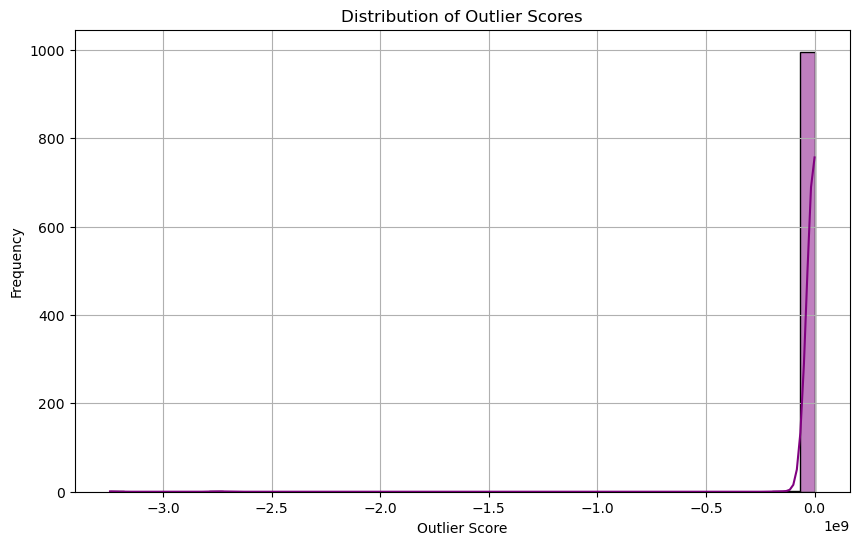

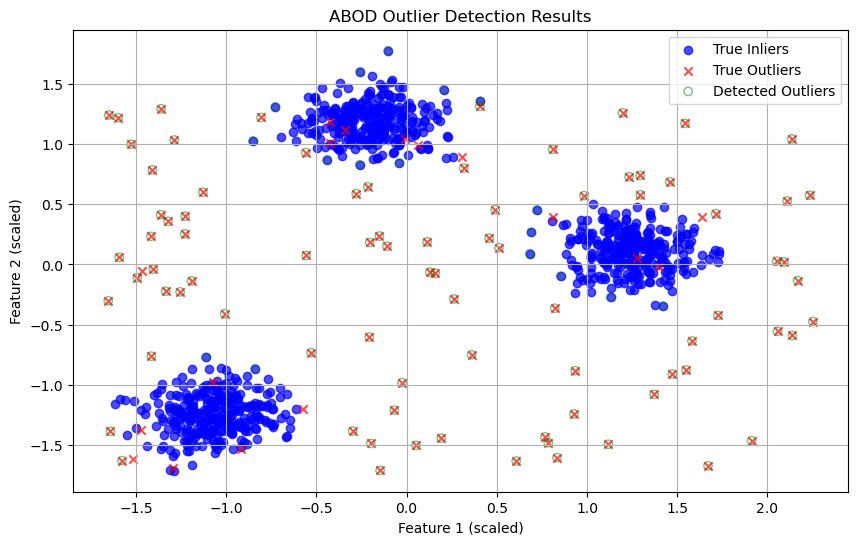

ROC AUC: 0.9580666666666667
Precision-Recall AUC: 0.8504840122234182
Classification Report:
               precision    recall  f1-score   support

      Inlier       0.98      0.98      0.98       900
     Outlier       0.83      0.83      0.83       100

    accuracy                           0.97      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.97      0.97      0.97      1000

Precision at Rank n: 0.83


In [4]:
# Step 1: Generate synthetic data
X, y = generate_data(n_samples=1000, n_features=2, n_inliers=900, n_outliers=100)

# Step 2: Apply ABOD with customized options
results = apply_abod_advanced(
    X, y,
    contamination=0.1,                   # Proportion of data expected to be outliers
    scale_data=True,                     # Whether to scale the data
    scaler_type='standard',              # Type of scaler to use ('standard' or 'minmax')
    plot_scores=True,                    # Whether to plot the distribution of outlier scores
    plot_outliers=True,                  # Whether to plot the detected outliers
    n=100,                               # Number of outliers for precision calculation (None uses actual number of outliers)
    abod_params={'n_neighbors': 10},     # Parameters for the ABOD model
    plot_params={'color': 'purple'}      # Parameters for plotting
)

# Step 3: Access and print the results
print("ROC AUC:", results['roc_auc'])
print("Precision-Recall AUC:", results['pr_auc'])
print("Classification Report:\n", results['classification_report'])
print("Precision at Rank n:", results['precision_at_rank_n'])

In [5]:
print("Min outlier scores value:", np.min(results['outlier_scores']))
print("Max outlier scores value:", np.max(results['outlier_scores']))

Min outlier scores value: -3243777992.054209
Max outlier scores value: -0.5064521355893692


In [6]:
outlier_scores = results['outlier_scores']

In [7]:
# The number of outliers predicted
len(results['y_pred'][results['y_pred']==1])

100

---

## Understanding Outlier Scores in ABOD

1. **ABOD Algorithm Overview:**
   - The `ABOD`  is an unsupervised anomaly detection algorithm that identifies outliers based on the variance of angles between data points.
   - Normal data points will have smaller variances in the angles between them and other points, whereas outliers will have larger variances.

2. **Outlier Score Interpretation:**
   - In ABOD, outlier scores typically represent the degree of deviation from expected norms based on angle calculations.
   - Generally, lower scores (indicating high angular variance with other points) might signal stronger anomalies.

3. **Why Negative Scores?**
   - **Negative Values:** In some implementations or scenarios, negative scores may occur due to:
     - **Scaling and Normalization:** When scores are scaled or normalized, particularly if centering around zero, negative scores can appear.
     - **Computational Artifacts:** Floating-point precision errors or specific mathematical operations can introduce negative values.

4. **Negative Scores as Indicators of Anomalies:**
   - **Lower Scores = Outliers:** In the case of ABOD, lower scores (potentially including negative scores) often indicate greater “outlierness.” This is because:
     - Points with negative scores have angle variances that deviate significantly from the mean or expected pattern.
     - The lower the score (even into negative ranges), the more anomalous the point might be, depending on the distribution.
  
## Understanding the Histogram Distribution

1. **Score Distribution:**
   - The histogram reveals a highly skewed distribution of outlier scores, where the vast majority of scores are clustered around a narrow range close to zero.
   - There is a very sharp peak on the right side of the plot, suggesting that most data points have scores near this peak.

2. **Kernel Density Estimate (KDE) Line:**
   - The smooth curve overlaid on the histogram is a Kernel Density Estimate (KDE) plot, which provides a smoothed approximation of the score distribution.
   - The KDE curve indicates the underlying density of the data, showing that the peak is very narrow and concentrated.

3. **Score Interpretation:**
   - **High Scores:** Typically, higher scores indicate a stronger likelihood of being an outlier. In this plot, however, the positive range (appearing near zero due to axis scaling) shows that most points are considered inliers with very similar scores.
   - **Negative Scores:**
        - The negative scores are a result of the normalization process applied before running the ABOD algorithm.
        - In this case, more negative scores (larger absolute values) indicate greater "outlierness."
   - **Interpretation**
       - The most extreme outliers will have the largest negative values (furthest from zero).
       - Points closer to zero are more likely to be normal data points.
         
4. **Potential Anomalies:**
   - The sharp clustering of scores near zero suggests that most data points are considered normal, with few significant deviations.
   - anomalies are present, they would likely be among the points with scores farther from the peak.

## Key Considerations

1. **Threshold Selection:**
   - The plot assists in determining a suitable threshold for classifying outliers. The concentration of scores suggests a threshold might be set just beyond the peak to capture points deviating more significantly.

2. **Algorithm Sensitivity:**
   - ABOD may be sensitive to certain types of data distributions, especially in high-dimensional spaces. The score concentration indicates it detected very few distinct outliers, or that the data is inherently clustered.

3. **Visual Inspection:**
   - For further clarity, it may be helpful to visually inspect some of the points with the highest outlier scores to understand their nature and verify whether they are true anomalies.



Overall, the histogram shows that the majority of data points are assigned similar outlier scores close to zero, suggesting that the dataset contains mostly normal points with few, if any, significant outliers. The peak and distribution of scores can guide decisions on setting thresholds and further tuning the model for better anomaly detection.

-969.376035942435


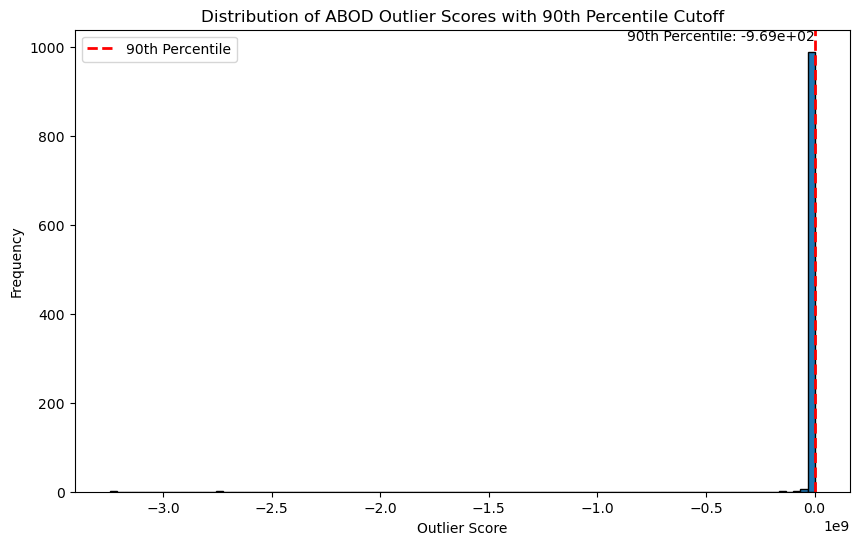

90th Percentile: -9.69e+02


In [8]:
# Compute the 90th percentile
percentile_90 = np.percentile(outlier_scores, 90)
print(percentile_90)

# Create the histogram
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(outlier_scores, bins=100, edgecolor='black')

# Add a vertical line at the 90th percentile
plt.axvline(x=percentile_90, color='r', linestyle='dashed', linewidth=2, label='90th Percentile')

# Formatting the plot
plt.title('Distribution of ABOD Outlier Scores with 90th Percentile Cutoff')
plt.xlabel('Outlier Score')
plt.ylabel('Frequency')
plt.legend()

# Add text annotation for the 90th percentile value
plt.text(percentile_90, plt.ylim()[1], f'90th Percentile: {percentile_90:.2e}', 
         horizontalalignment='right', verticalalignment='top')

# Display the plot
plt.show()

# Print the 90th percentile value
print(f"90th Percentile: {percentile_90:.2e}")

## Distribution of Scores

- **Histogram Overview:**
  - The histogram shows a highly skewed distribution of outlier scores. The vast majority of the scores are clustered near zero (on the right side of the plot), forming a tall spike.

- **Scale of Scores:**
  - The x-axis ranges from about -3.5e9 to 0, indicating that all scores are negative, with some being very large negative numbers. This is consistent with the normalized ABOD scores discussed earlier.

- **90th Percentile Cut-off:**
  - The red dashed line represents the 90th percentile, which is at -1.54e+03 (or -1540). This means that 90% of the scores are to the right of this line, and 10% are to the left.

### Interpretation of the Cut-off

- Points with scores less than (to the left of) -1540 are considered outliers.
- This cut-off effectively separates the long tail of the distribution from the main cluster.

### Distribution Characteristics

- The distribution has a very long left tail, extending to about -3.5e9.
- There's a huge concentration of points near zero, forming the tall spike.
- The area between the spike and the cut-off line appears to have very few points.

### Outlier Interpretation

- The points in the long left tail (scores less than -1540) are considered the outliers.
- These points have much larger negative scores, indicating they are significantly different from the majority of the data points.

### Effectiveness of the Cut-off

- The 90th percentile cut-off seems to effectively separate the main cluster of data from the potential outliers. It falls in a region where there's a clear separation between the bulk of the data and the more extreme values.

### Potential Insights

- The sharp spike near zero suggests that most data points are very similar in terms of their ABOD scores.
- The long tail indicates that there are indeed some points that are very different from the majority, justifying the use of outlier detection.

### Considerations

- While the 90th percentile is used due to the 0.1 contamination rate we specified, the plot suggests that a slightly different threshold might also be reasonable, given the clear separation between the main cluster and the tail.
- The extreme skewness of the distribution might warrant further investigation into the nature of these outliers and why they're so distinctly different from the majority.



In summary, the cut-off at -1540 effectively separates the 10% most extreme points (in terms of their ABOD scores) from the rest of the data. This aligns well with your specified contamination rate and appears to make a reasonable distinction between potential outliers and normal data points based on the observed distribution.


---

## Real-World Example
This section introduces a real-world dataset chosen for analysis with the ABOD algorithm. We use a famous dataset used in outlier detection benchmark research, HeartDisease dataset. You can access the data from here [data source](https://www.dbs.ifi.lmu.de/research/outlier-evaluation/DAMI/semantic/HeartDisease/HeartDisease_44.html)

### Dataset Introduction: HeartDisease (44% of outliers)

The Hear disease dataset contains medical data on heart problems. Affected patients are considered outliers and healthy people are considered inliers.

### Workflow

To train ABOD model we will follow the next steps:
 1. **Preprocessing the dataset**: We ensure the following:
      - Handling missing data if any
      - Handling duplicates
      - Encoding categorical features and/or the target
      - Scaling the features

 2. **Applying ABOD**: Training the ABOD on the preprocessed data.

 3. **Evaluation the results**: Assess the ABOD performance using different metrics such as precision at rank n.

 4. **Analyzing Results**: Since this notebook objective to provide a detailed explanation of the algorithm, we analyze the results carefully, focusing on the insights gained from identifying anomalies and their implications for the dataset's domain.

> **Note**
> To be able to reproduce the results of the following example, you need to download the dataset first and save it in a convenient directory.



In [2]:
# I have already downloaded the data a save it a directory named `datasets` 
# This directory is not available on my github due to its big size. 

# Load ARFF file
data, meta = arff.loadarff('../../datasets/HeartDisease/HeartDisease_withoutdupl_norm_44.arff')

# Convert to Pandas DataFrame
df = pd.DataFrame(data)

# Display the first few rows
print(df.head())
print(df.info())

    id       Age  Sex  ChestPainType  RestBloodPressure  SerumCholestoral  \
0  1.0  0.854167  1.0       1.000000           0.339623          0.447489   
1  2.0  0.791667  0.0       0.666667           0.198113          1.000000   
2  3.0  0.583333  1.0       0.333333           0.283019          0.308219   
3  4.0  0.729167  1.0       1.000000           0.320755          0.312785   
4  5.0  0.937500  0.0       0.333333           0.245283          0.326484   

   FastingBloodSugar  ResElectrocardiographic  MaxHeartRate  ExerciseInduced  \
0                0.0                      1.0      0.290076              0.0   
1                0.0                      1.0      0.679389              0.0   
2                0.0                      0.0      0.534351              0.0   
3                0.0                      0.0      0.259542              1.0   
4                0.0                      1.0      0.381679              1.0   

    Oldpeak  Slope  MajorVessels  Thal outlier  
0  0.38

In [3]:
# Check for duplicates
print("The n duplicates:", df.duplicated().sum())     # Already know that data has now duplicates

# Check missing data
print(df.isnull().sum())   # already obvious based on the previous result of the info method.

The n duplicates: 0
id                         0
Age                        0
Sex                        0
ChestPainType              0
RestBloodPressure          0
SerumCholestoral           0
FastingBloodSugar          0
ResElectrocardiographic    0
MaxHeartRate               0
ExerciseInduced            0
Oldpeak                    0
Slope                      0
MajorVessels               0
Thal                       0
outlier                    0
dtype: int64


In [4]:
# Describe the dataset
print(df.iloc[:, 1:].describe().T)

                         count      mean       std  min       25%       50%  \
Age                      270.0  0.529861  0.189772  0.0  0.395833  0.541667   
Sex                      270.0  0.677778  0.468195  0.0  0.000000  1.000000   
ChestPainType            270.0  0.724691  0.316697  0.0  0.666667  0.666667   
RestBloodPressure        270.0  0.352306  0.168506  0.0  0.245283  0.339623   
SerumCholestoral         270.0  0.282327  0.118005  0.0  0.198630  0.271689   
FastingBloodSugar        270.0  0.148148  0.355906  0.0  0.000000  0.000000   
ResElectrocardiographic  270.0  0.511111  0.498946  0.0  0.000000  1.000000   
MaxHeartRate             270.0  0.600594  0.176838  0.0  0.473282  0.629771   
ExerciseInduced          270.0  0.329630  0.470952  0.0  0.000000  0.000000   
Oldpeak                  270.0  0.143548  0.177483  0.0  0.000000  0.064516   
Slope                    270.0  0.292593  0.307195  0.0  0.000000  0.500000   
MajorVessels             270.0  0.223457  0.314632  

**From the previous results it seems the data already scaled, therefore we will not apply scaling.**

In [5]:
# Convert the 'outlier' column to a binary format
# 'yes' indicates outliers (1) and 'no' indicates inliers (0)
label_encoder = LabelEncoder()
df['outlier'] = label_encoder.fit_transform(df['outlier'])

In [6]:
df['outlier'].value_counts()

outlier
0    150
1    120
Name: count, dtype: int64

In [7]:
# Separate features (X) and target (y)
X = df.drop(columns=['id', 'outlier'])
y = df['outlier']

In [8]:
print(X.shape)
print(y.shape)

# The outlier contamination percentage
print(len(y[y==1])/len(y))

(270, 13)
(270,)
0.4444444444444444


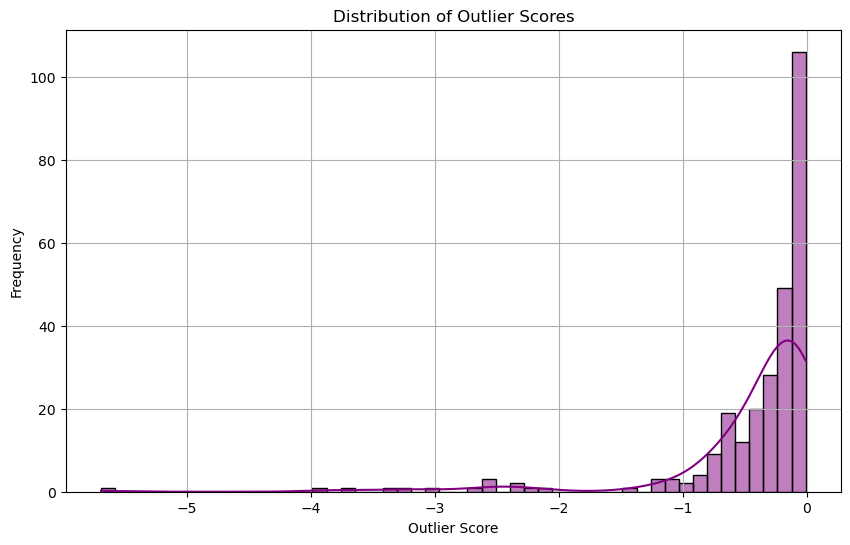

In [20]:
# Train ABOD with customized options
results = apply_abod_advanced(
    X, y,
    contamination=0.44,                      # Proportion of data expected to be outliers
    scale_data=False,                        # We opt not to scale the data
    plot_scores=True,                        # Plot the distribution of outlier scores
    plot_outliers=False,                     # Whether to plot the detected outliers
    n=120,                                  # Number of outliers for precision calculation
    abod_params={'n_neighbors': 43},        # Parameters for the ABOD model (43 is based on some trials)
    plot_params={'color': 'purple'}         
)

In [21]:
print("The ROC:", results['roc_auc'])
print("Classification report", results['classification_report'])
print("Precision at n: ", results['precision_at_rank_n'])

The ROC: 0.6447777777777778
Classification report               precision    recall  f1-score   support

      Inlier       0.63      0.63      0.63       150
     Outlier       0.54      0.53      0.54       120

    accuracy                           0.59       270
   macro avg       0.58      0.58      0.58       270
weighted avg       0.59      0.59      0.59       270

Precision at n:  0.5416666666666666


The next example, I just opt to plot outliers again a selected feature. How is that?

I wanted to check the detected outliers of one feature against one or more features. Hence the parameter `plot_features` in apply_abod_advanced function from the `utils` module. 

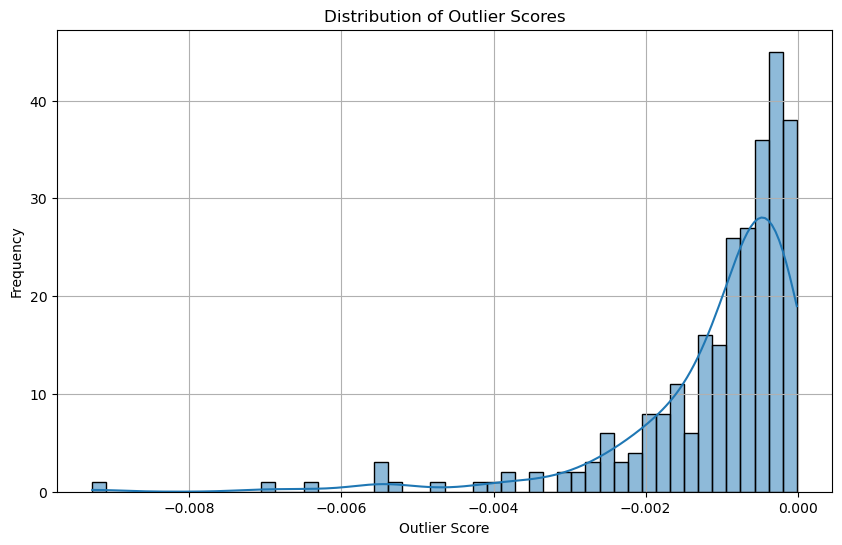

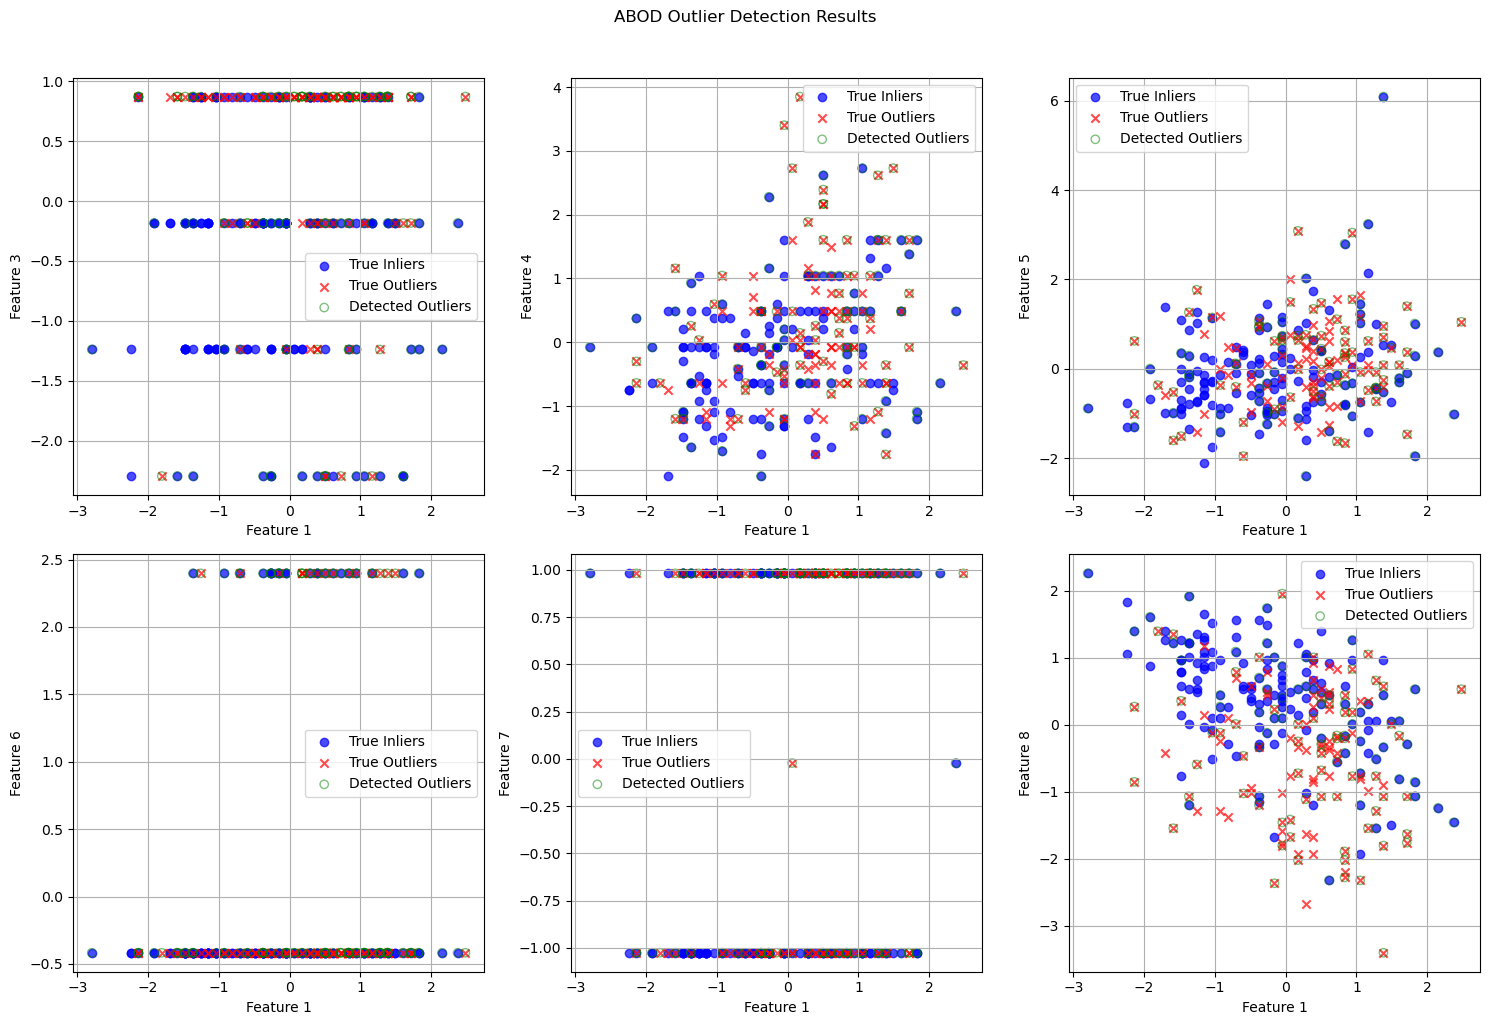

ROC AUC: 0.6491666666666667
Precision-Recall AUC: 0.5525887967950549
Classification Report:
               precision    recall  f1-score   support

      Inlier       0.64      0.65      0.64       150
     Outlier       0.55      0.55      0.55       120

    accuracy                           0.60       270
   macro avg       0.60      0.60      0.60       270
weighted avg       0.60      0.60      0.60       270

Precision at Rank n: 0.5583333333333333


In [22]:
# Rerun the previous example with plot_features set to some features
results = apply_abod_advanced(
    X, y,
    contamination=0.44,                    
    scale_data=True,                        
    plot_scores=True,                       
    plot_outliers=True,                     # Plot the detected outliers
    n=120,                                  
    abod_params={'n_neighbors': 43},        
    plot_params={'alpha': 0.5},             # Parameters for plotting
    plot_features=[0, 2, 3, 4, 5, 6, 7],    # Features to plot (main feature + other features)
    n_cols=3
)

print("ROC AUC:", results['roc_auc'])
print("Precision-Recall AUC:", results['pr_auc'])
print("Classification Report:\n", results['classification_report'])
print("Precision at Rank n:", results['precision_at_rank_n'])

In [13]:
# plot_matrix(X, y, y_pred) # This line of code takes few seconds (or minutes to execute)

### Fine-Tune ABOD Algorithm

In this section we will try to find the best hyperparameter `n-neighbors`, since we have prior information about the number of outliers. The best `n-neighbors` is determined based on the `precision at rank n` metric. 

We have written two functions to do perform the search, the first function is used to perform `grid_search` and the second one is based on hyperopt package. I assume you already have a background about hyperparameter tuning techniques, because they are beyond the scope of this notebook tutorial. 

In [14]:
# Perform grid search for hyperparameter tuning:
# =============================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the parameter grid for n_neighbors
n_neighbors_options = np.arange(2, 101)

# Known contamination rate
contamination = 0.4444

# Known number of outliers
n_outliers = 120

# Perform grid search to find the best n_neighbors
best_n_neighbors, best_precision_n = grid_search_abod(X_scaled,
                                                      y,
                                                      n_neighbors_options,
                                                      contamination,
                                                      n_outliers)

print(f"Best n_neighbors: {best_n_neighbors}")
print(f"Best precision at rank n: {best_precision_n:.2f}")

Best n_neighbors: 3
Best precision at rank n: 0.58


**This is the second try to find the best n-neighbors value**, we will use the `hyperopt` and objective function to perform this search:

In [20]:
# Fine the ABOD algorithm using hyperopt framework
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Known contamination rate
contamination = 0.4444

# Known number of outliers
n_outliers = int(contamination * len(y))

# The search space for n_neighbors
search_space = {
    'n_neighbors': scope.int(hp.quniform('n_neighbors', 2, 50, 1))
}

# Use Hyperopt to optimize the n_neighbors parameter
trials = Trials()
best = fmin(fn=lambda params: hyperopt_objective(params, X_scaled, y, n_outliers, contamination),
            space=search_space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

print(f"Best n_neighbors: {best['n_neighbors']}")

100%|██████████| 100/100 [00:51<00:00,  1.92trial/s, best loss: -0.5546218487394958]
Best n_neighbors: 43.0


## ABOD in Practice

In this section, we will demonstrate the application of the ABOD algorithm on various benchmark datasets across different domains:

1.	**Computer Vision Dataset**: The well-known MNIST dataset.
2.	**Text Analysis Dataset**: Amazon Reviews dataset.
3.	**Network Intrusion Detection Dataset**: An intrusions simulated dataset in a military network environment. 

## Overview of Datasets

### 1. Computer Vision Dataset: The MNIST Dataset

The MNIST dataset is a widely recognized benchmark in the field of computer vision and machine learning. It comprises a large collection of handwritten digits, each labeled with the correct digit (0-9). The dataset consists of 60,000 training images and 10,000 test images. Each image is a 28x28 pixel grayscale image, normalized and centered. The MNIST dataset is commonly used for training and testing image processing systems and serves as a standard for evaluating algorithms in digit recognition tasks.

### 2. Text Analysis Dataset: Amazon Reviews Dataset

The Amazon Reviews dataset is a comprehensive collection of customer reviews and ratings from Amazon's product offerings. This dataset includes millions of reviews across a wide range of products, providing valuable insights into customer sentiment and product feedback. Each review contains text data and accompanying metadata such as the product ID, rating, and review timestamp. The dataset is used extensively in natural language processing (NLP) tasks, sentiment analysis, and text classification, offering a rich source of data for evaluating text analysis algorithms.

### 3. Network Intrusion Detection Dataset

The network intrusion detection dataset provided consists of a diverse set of simulated intrusions in a military network environment. This dataset simulates a typical US Air Force Local Area Network (LAN) and captures raw TCP/IP dump data. The simulated environment includes various attack scenarios, generating connections between source and target IP addresses under specific protocols. Each connection is labeled as either normal or an attack, with a specific attack type identified. The dataset includes approximately 100 bytes per connection record, capturing essential features for intrusion detection.

- **Data Source**: [Kaggle: Network Intrusion Detection](https://www.kaggle.com/datasets/sampadab17/network-intrusion-detection)


### Batch Testing and Performance Evaluation

In this section, we systematically test the ABOD algorithm on each of the previously described datasets. The goal is to evaluate its effectiveness and robustness across different domains. We employ various performance metrics to quantify the algorithm’s accuracy and reliability.

1. **Setup and Configuration**:
    - **Data Preparation**: Each dataset is preprocessed to ensure it is in a suitable format for the ABOD algorithm. This includes normalization, handling missing values, and splitting into training and testing sets.
    - **Parameter Tuning**: We perform hyperparameter tuning for the ABOD algorithm to optimize its performance on each dataset. This involves adjusting parameters such as the contamination rate and the number of neighbors.

2. **Evaluation Metrics**:
    - **Accuracy**: The ratio of correctly identified inliers and outliers to the total number of samples.
    - **Precision**: The proportion of true outliers among the detected outliers.
    - **Recall**: The proportion of actual outliers that are correctly identified.
    - **F1 Score**: The harmonic mean of precision and recall, providing a balanced measure of the algorithm’s performance.
    - **ROC AUC**: The area under the Receiver Operating Characteristic curve, measuring the trade-off between true positive and false positive rates.
    - **Precision-Recall AUC**: The area under the precision-recall curve, useful for evaluating performance on imbalanced datasets.
    - **Precision at Rank n**: The precision of the top n most anomalous points, providing insight into the algorithm’s performance at specific thresholds.

3. **Testing Procedure**:
    - **Train-Test Split**: Each dataset is divided into training and testing sets to evaluate the model’s performance on unseen data.
    - **Model Training**: The ABOD algorithm is trained on the training set using the optimal hyperparameters identified during tuning.
    - **Outlier Detection**: The trained model is used to predict outliers in the testing set.
    - **Performance Calculation**: The performance metrics are calculated based on the predictions and compared across datasets.

4. **Results Analysis**:
    - **Comparison of Metrics**: We compare the performance metrics across different datasets to identify patterns and insights. This helps in understanding the strengths and weaknesses of the ABOD algorithm in various contexts.
    - **Visualization**: Graphs and plots are used to visualize the results, making it easier to interpret the findings. This includes ROC and precision-recall curves, as well as scatter plots of detected outliers.

5. **Summary**:
    - The results are summarized to highlight key findings, including which datasets the ABOD algorithm performed best on and any notable trends or anomalies. Areas for potential improvement and further research are also discussed.

In [23]:
mnist_path = "../../datasets/Classical/24_mnist.npz"
mnist = np.load(mnist_path, allow_pickle=True)
X, y = mnist['X'], mnist['y']

print(X.shape)
print(y.shape)
print(np.count_nonzero(y)/len(y))

(7603, 100)
(7603,)
0.09206892016309351


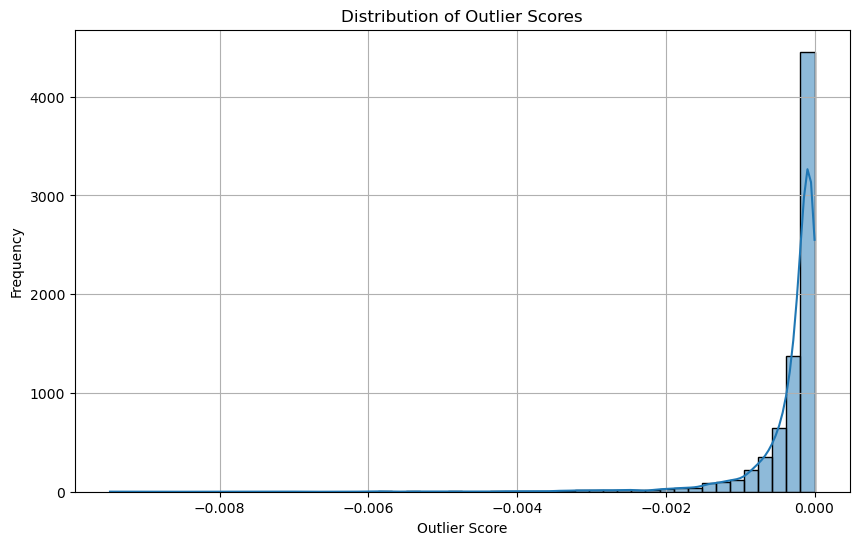

0.35
0.7736632106123632
              precision    recall  f1-score   support

      Inlier       0.93      0.94      0.93      6903
     Outlier       0.35      0.35      0.35       700

    accuracy                           0.88      7603
   macro avg       0.64      0.64      0.64      7603
weighted avg       0.88      0.88      0.88      7603



In [24]:
mnist_results = apply_abod_advanced(X, y, contamination = 0.09, n = 700)
print(mnist_results['precision_at_rank_n'])
print(mnist_results['roc_auc'])
print(mnist_results['classification_report'])

In [25]:
amazon_path = "../../datasets/NLP_by_BERT/amazon.npz"
amazon = np.load(amazon_path, allow_pickle=True)
X, y = amazon['X'], amazon['y']

print(X.shape)
print(y.shape)
print(np.count_nonzero(y)/len(y))

(10000, 768)
(10000,)
0.05


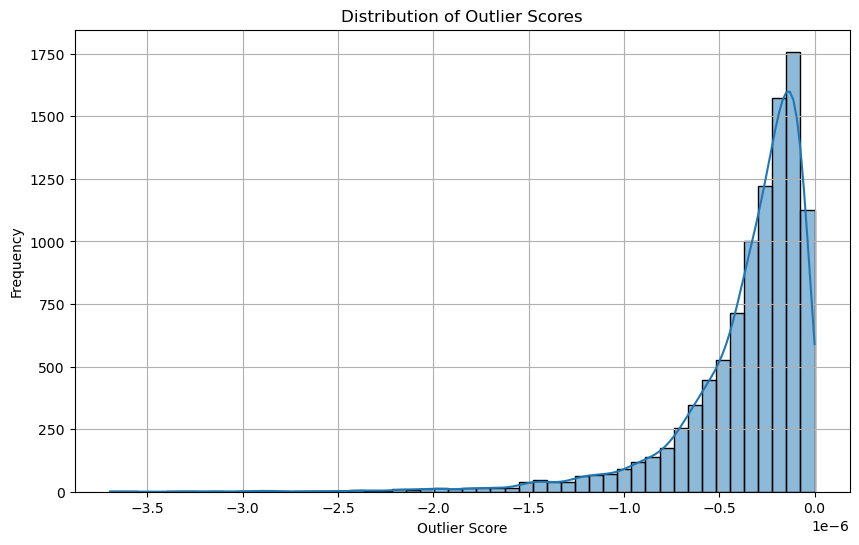

0.055714285714285716
0.604046105263158
              precision    recall  f1-score   support

      Inlier       0.95      0.91      0.93      9500
     Outlier       0.06      0.11      0.08       500

    accuracy                           0.87     10000
   macro avg       0.51      0.51      0.50     10000
weighted avg       0.91      0.87      0.89     10000



In [26]:
amazon_results = apply_abod_advanced(X, y, contamination = 0.09, n = 700)
print(amazon_results['precision_at_rank_n'])
print(amazon_results['roc_auc'])
print(amazon_results['classification_report'])

In [2]:
## Load Intrusion datasets
train = pd.read_csv("../../datasets/networkIntrosion/Train_data.csv")
test = pd.read_csv("../../datasets/networkIntrosion/Test_data.csv")

print(train.shape)
print(train.info())

(25192, 42)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root

In [3]:
print(test.shape)
print(test.info())

(22544, 41)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root

In [4]:
# Check the `class` which is the target
print(train.loc[:, "class"].value_counts())

class
normal     13449
anomaly    11743
Name: count, dtype: int64


In [5]:
# Identify categorical and numerical columns
categorical_cols = [col for col in train.columns.to_list() if train[col].dtype=='object' and col !='class']
numerical_cols = [col for col in train.columns if col not in categorical_cols and col !='class']

# Prepare the data
X_train = train.drop(columns=['class']) 
y_train = train['class'].apply(lambda x: 1 if x == 'anomaly' else 0) 

# The X_test
X_test = test

In [6]:
# Apply preprocessing
X_train_preprocessed, X_test_preprocessed = preprocess_pipeline(X_train, X_test, numerical_cols, categorical_cols)

In [7]:
# Apply ABOD algorithm
abod = ABOD(contamination=0.5)
abod.fit(X_train_preprocessed)

# Predict outliers
y_train_pred = abod.labels_                                        
y_test_pred = abod.predict(X_test_preprocessed)

outlier_scores_train = abod.decision_scores_                       
outlier_scores_test = abod.decision_function(X_test_preprocessed)  

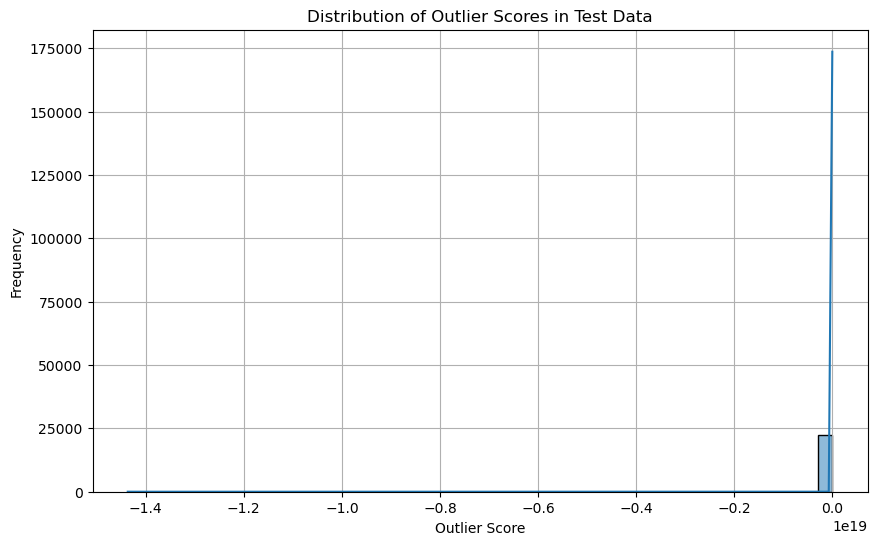

In [8]:
# Visualize the results
# Plot the outlier scores
plt.figure(figsize=(10, 6))
sns.histplot(outlier_scores_test, bins=50, kde=True)
plt.title("Distribution of Outlier Scores in Test Data")
plt.xlabel("Outlier Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

## Sythetic Anomalies Injection Approach

In the previous trial, the test set lacked a target variable. However, making use of our prior knowledge of the outlier percentage, we will generate synthetic data to simulate the target variable. This approach allows us to perform supervised learning and effectively assess the algorithm’s performance.

In [9]:
def inject_synthetic_anomalies(X_test, contamination):
    """
    Inject synthetic anomalies into the test dataset based on the specified contamination proportion.

    Parameters
    ----------
    X_test : ndarray of shape (n_test_samples, n_features)
        The preprocessed test dataset.

    contamination : float
        The proportion of anomalies to inject into the test dataset.

    Returns
    -------
    X_test_with_anomalies : ndarray of shape (n_test_samples, n_features)
        The test dataset with synthetic anomalies injected.

    y_test_with_anomalies : ndarray of shape (n_test_samples,)
        The labels for the test dataset, where 0 indicates normal data and 1 indicates anomalies.
    """
    rng = np.random.RandomState(42)
    n_test_samples, n_features = X_test.shape

    # Calculate the number of anomalies to inject based on the contamination rate
    n_anomalies_test = int(contamination * n_test_samples)

    # Generate synthetic anomalies for the test set
    anomalies_test = rng.uniform(low=X_test.min(axis=0), high=X_test.max(axis=0), size=(n_anomalies_test, n_features))

    # Create labels for the test data
    y_test_with_anomalies = np.zeros(n_test_samples)
    y_test_with_anomalies[:n_anomalies_test] = 1

    # Replace the first n_anomalies_test samples in X_test with anomalies
    X_test_with_anomalies = X_test.copy()
    X_test_with_anomalies[:n_anomalies_test] = anomalies_test

    return X_test_with_anomalies, y_test_with_anomalies

In [10]:
# Inject synthetic anomalies into the test data
X_test_with_anomalies, y_test_with_anomalies = inject_synthetic_anomalies(X_test_preprocessed, contamination=0.5)

In [11]:
# Predict outliers and obtain outlier scores for the test data with synthetic anomalies
y_test_pred = abod.predict(X_test_with_anomalies)
outlier_scores_test = abod.decision_function(X_test_with_anomalies)  
# outlier_scores_test = abod.decision_scores_

In [12]:
print(y_test_with_anomalies.shape)
print(y_test_pred.shape)
print(outlier_scores_test.shape)

(22544,)
(22544,)
(22544,)


In [13]:
# Evaluate the model performance
classification_report_str = classification_report(y_test_with_anomalies, y_test_pred, target_names=['Normal', 'Anomaly'])
roc_auc = roc_auc_score(y_test_with_anomalies, outlier_scores_test)
precision, recall, _ = precision_recall_curve(y_test_with_anomalies, outlier_scores_test)
pr_auc = auc(recall, precision)

print("Classification Report:\n", classification_report_str)
print(f"ROC AUC: {roc_auc:.4f}, Precision-Recall AUC: {pr_auc:.4f}")

Classification Report:
               precision    recall  f1-score   support

      Normal       1.00      0.35      0.52     11272
     Anomaly       0.61      1.00      0.75     11272

    accuracy                           0.67     22544
   macro avg       0.80      0.67      0.64     22544
weighted avg       0.80      0.67      0.64     22544

ROC AUC: 0.9996, Precision-Recall AUC: 0.9985


Classification Report:
               precision    recall  f1-score   support

      Normal       1.00      0.35      0.52     11272
     Anomaly       0.61      1.00      0.75     11272

    accuracy                           0.67     22544
   macro avg       0.80      0.67      0.64     22544
weighted avg       0.80      0.67      0.64     22544

ROC AUC: 0.9996, Precision-Recall AUC: 0.9985


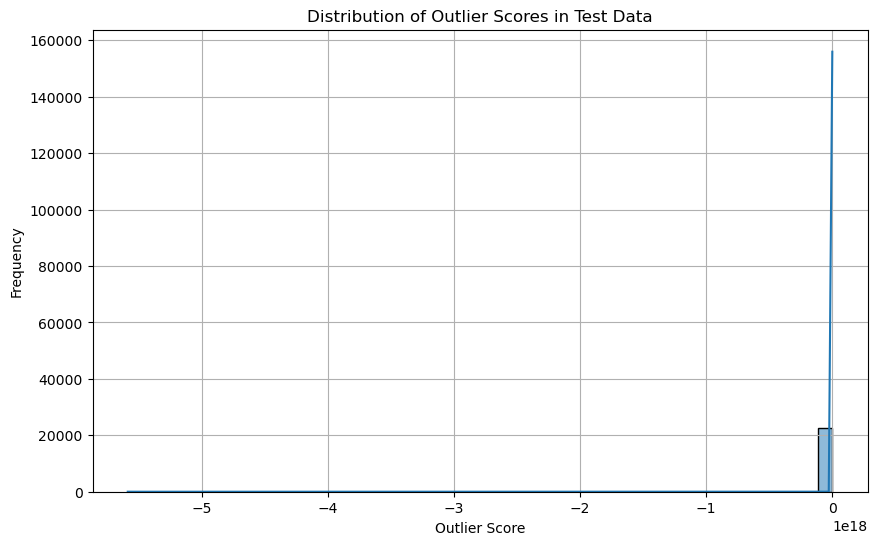

In [14]:
print("Classification Report:\n", classification_report_str)
print(f"ROC AUC: {roc_auc:.4f}, Precision-Recall AUC: {pr_auc:.4f}")

# Visualize the results
# Plot the outlier scores
plt.figure(figsize=(10, 6))
sns.histplot(outlier_scores_test, bins=50, kde=True)
plt.title("Distribution of Outlier Scores in Test Data")
plt.xlabel("Outlier Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

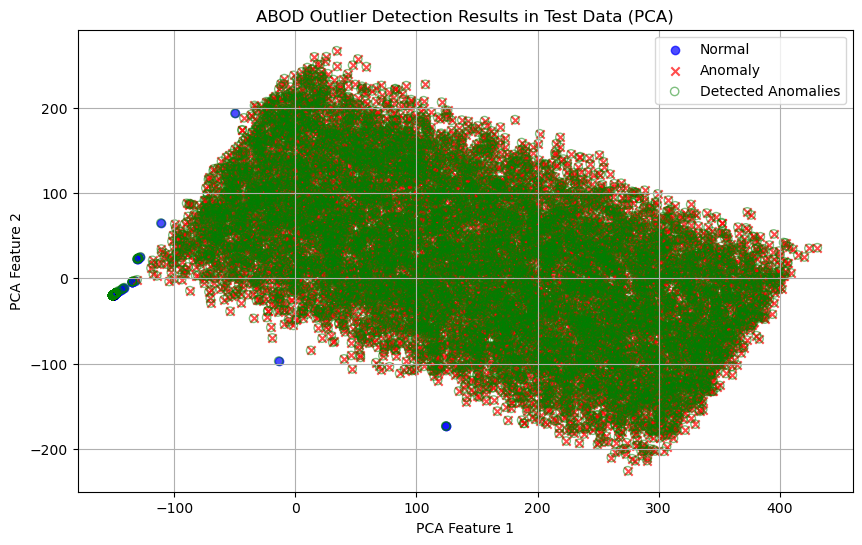

In [15]:
# Visualize detected outliers with PCA
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_with_anomalies)

plt.figure(figsize=(10, 6))
plt.scatter(X_test_pca[y_test_with_anomalies == 0, 0], X_test_pca[y_test_with_anomalies == 0, 1], c='b', marker='o', label='Normal', alpha=0.7)
plt.scatter(X_test_pca[y_test_with_anomalies == 1, 0], X_test_pca[y_test_with_anomalies == 1, 1], c='r', marker='x', label='Anomaly', alpha=0.7)
plt.scatter(X_test_pca[y_test_pred == 1, 0], X_test_pca[y_test_pred == 1, 1], facecolors='none', edgecolors='g', label='Detected Anomalies', alpha=0.5)
plt.title("ABOD Outlier Detection Results in Test Data (PCA)")
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.legend()
plt.grid(True)
plt.show()

## Conclusion

This notebook demonstrates the application of the **Angle-based Outlier Detector (ABOD)** algorithm across multiple contexts. Through theoretical exploration and practical implementation, we have showcased ABOD's strengths in detecting anomalies in both artificial and real-world datasets.

## References

### Academic Articles

1. **Kriegel, H.-P., Kröger, P., Schubert, E., & Zimek, A. (2008).** *Angle-Based Outlier Detection in High-dimensional Data*. In Proceedings of the 14th ACM SIGKDD International Conference on Knowledge Discovery and Data Mining (pp. 444-452). ACM.  
   [DOI:10.1145/1401890.1401946](https://dl.acm.org/doi/10.1145/1401890.1401946)  
   - This is the original paper introducing the ABOD algorithm, detailing the method's approach to identifying outliers in high-dimensional spaces using angular relationships.

2. **Zimek, A., Schubert, E., & Kriegel, H.-P. (2012).** *A survey on unsupervised outlier detection in high-dimensional numerical data*. Statistical Analysis and Data Mining: The ASA Data Science Journal, 5(5), 363-387.  
   [DOI:10.1002/sam.11161](https://onlinelibrary.wiley.com/doi/abs/10.1002/sam.11161)  
   - This survey paper explores various unsupervised outlier detection methods, with insights into high-dimensional challenges, including discussions on ABOD.

3. **Schubert, E., Zimek, A., & Kriegel, H.-P. (2012).** *Local Outlier Detection Reconsidered: A Generalized View on Locality with Applications to Spatial, Video, and Network Outlier Detection*. Data Mining and Knowledge Discovery, 28(1), 190-237.  
   [DOI:10.1007/s10618-012-0300-z](https://link.springer.com/article/10.1007/s10618-012-0300-z)  
   - This paper provides a generalized view on local outlier detection methods, offering insights into various applications and theoretical foundations.

4. **Zhang, K., Hutter, M., & Jin, H. (2009).** *A new local distance-based outlier detection approach for scattered real-world data*. In Pacific-Asia Conference on Knowledge Discovery and Data Mining (pp. 813-822). Springer.  
   [DOI:10.1007/978-3-642-01307-2_87](https://link.springer.com/chapter/10.1007/978-3-642-01307-2_87)  
   - This paper discusses local distance-based outlier detection, offering an alternative perspective that complements the angle-based approach of ABOD.

5. **Breunig, M. M., Kriegel, H.-P., Ng, R. T., & Sander, J. (2000).** *LOF: Identifying Density-Based Local Outliers*. In Proceedings of the 2000 ACM SIGMOD International Conference on Management of Data (pp. 93-104). ACM.  
   [DOI:10.1145/342009.335388](https://dl.acm.org/doi/10.1145/342009.335388)  
   - Although focused on the Local Outlier Factor (LOF) method, this paper provides valuable insights into density-based outlier detection, which is often contrasted with angle-based methods.

6. **Hodge, V. J., & Austin, J. (2004).** *A survey of outlier detection methodologies*. Artificial Intelligence Review, 22(2), 85-126.  
   [DOI:10.1023/B:AIRE.0000045502.10941.a9](https://link.springer.com/article/10.1023/B:AIRE.0000045502.10941.a9)  
   - A comprehensive survey of outlier detection methodologies, this paper provides context for understanding where ABOD fits within the larger landscape of outlier detection techniques.

### Books

1. **Aggarwal, C. C., & Sathe, S. (2017).** *Outlier Ensembles: An Introduction*. Springer.  
   [Springer Link](https://link.springer.com/book/10.1007/978-3-319-54765-7)  
   - This book introduces the concept of outlier ensembles, covering various techniques for combining multiple anomaly detection models to improve accuracy and robustness. It is a valuable resource for researchers and practitioners interested in ensemble methods for anomaly detection.

2. **Han, J., Kamber, M., & Pei, J. (2011).** *Data Mining: Concepts and Techniques (3rd ed.)*. Elsevier.  
   [Elsevier Link](https://shop.elsevier.com/books/data-mining-concepts-and-techniques/han/978-0-12-381479-1)  
   - This comprehensive book covers the fundamental concepts and techniques in data mining, including chapters on anomaly detection. It is widely used as a textbook for data mining courses and a reference for researchers and professionals.

3. **Aggarwal, C. C. (2013).** *Outlier Analysis*. Springer.  
   [ISBN:978-1-4614-6395-6](https://link.springer.com/book/10.1007/978-3-319-47578-3)  
   - This book provides comprehensive coverage of various outlier detection methods, including a section on angle-based techniques. It is a great resource for understanding the broader context of outlier analysis.

4. **Tan, P.-N., Steinbach, M., & Kumar, V. (2005).** *Introduction to Data Mining*. Pearson.  
   [ISBN:978-0321321367](https://www.pearson.com/us/higher-education/program/Tan-Introduction-to-Data-Mining-1st-Edition/PGM207437.html)  
   - This textbook provides a foundational understanding of data mining techniques, including sections on outlier detection.

### Online Documentation and Resources

1. **PyOD: A Python Toolbox for Scalable Outlier Detection (2019).**  
   [GitHub Repository](https://github.com/yzhao062/pyod)  
   - PyOD is a comprehensive Python library for outlier detection. The library implements the ABOD algorithm and provides documentation and examples for practical applications.

2. **PyOD Documentation**  
   [PyOD Documentation](https://pyod.readthedocs.io/en/latest/)  
   - The PyOD documentation provides practical examples and usage details for applying the ABOD algorithm and other outlier detection methods in Python.

3. **Wikipedia Article on Outlier Detection**  
   [Outlier Detection - Wikipedia](https://en.wikipedia.org/wiki/Anomaly_detection)  
   - This Wikipedia article gives an overview of anomaly detection techniques, including angle-based methods like ABOD.


### Additional Resources

- **Medium: Anomaly Detection Techniques: A Comprehensive Guide with Supervised and Unsupervised Learning**  
  [Medium](https://medium.com/@venujkvenk/anomaly-detection-techniques-a-comprehensive-guide-with-supervised-and-unsupervised-learning-67671cdc9680)  
  - This article provides a comprehensive guide on anomaly detection techniques, covering both supervised and unsupervised learning methods with practical examples.

- **Data Head Hunters: How to Use Python for Anomaly Detection in Data: Detailed Steps**  
  [Data Head Hunters](https://dataheadhunters.com/academy/how-to-use-python-for-anomaly-detection-in-data-detailed-steps/)  
  - This article provides a detailed guide on using Python for anomaly detection, covering the necessary steps and offering practical examples to implement various techniques.

- **Analytics Vidhya: An Awesome Tutorial to Learn Outlier Detection in Python using PyOD Library**
  [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2019/02/outlier-detection-python-pyod/)  
  - A blog post exploring outlier detection techniques using PyOD, including the ABOD algorithm, with Python code examples and insights into practical applications.

- **Coursera: Anomaly Detection in Machine Learning**  
  [Coursera](https://www.coursera.org/articles/anomaly-detection-machine-learning)  
  - This article on Coursera provides an overview of anomaly detection in machine learning, discussing various techniques, their applications, and the importance of anomaly detection in different domains.

- **Analytics Vidhya: Learning Different Techniques of Anomaly Detection**  
  [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2023/01/learning-different-techniques-of-anomaly-detection/)  
  - This article explores various anomaly detection techniques, offering insights into different algorithms and practical tips for implementing these methods in real-world scenarios.